In [1]:
import numpy as np
import soundfile as sf
from scipy.signal import periodogram, spectrogram
import matplotlib.pyplot as plt

In [20]:
sig, samplerate = sf.read('ele.wav')
print(sig.shape, samplerate)

(7580160, 2) 44100


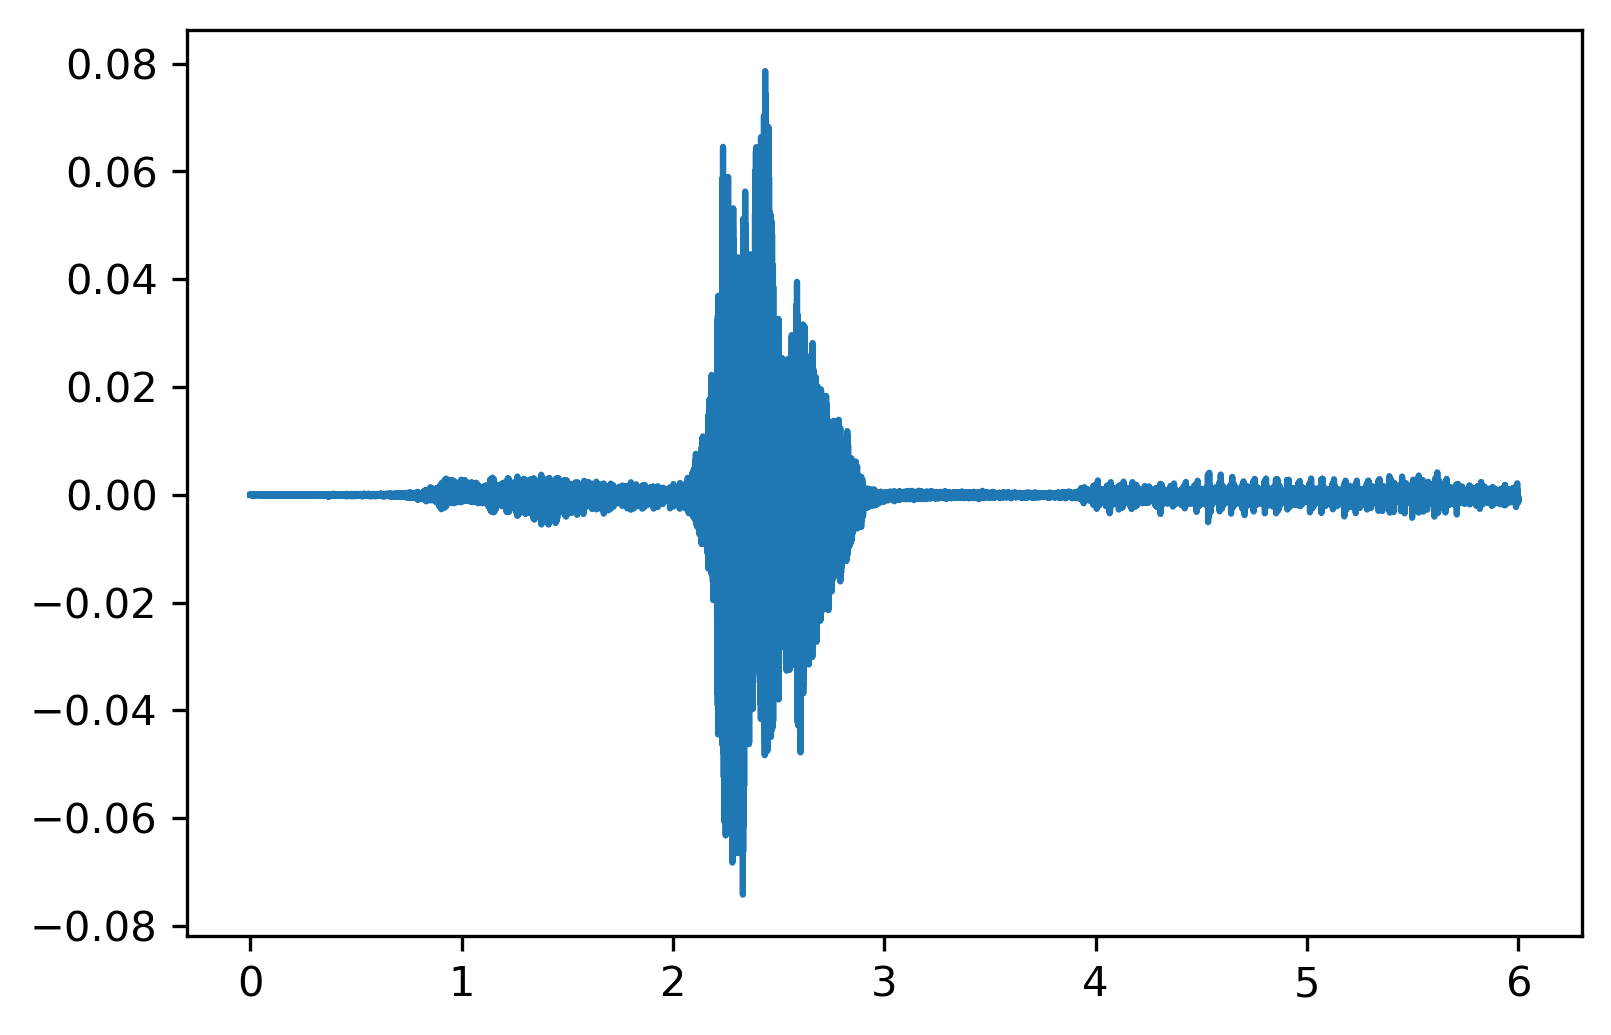

In [37]:
t = 1
plt.figure(dpi=300)
plt.plot(np.arange(0,t*6,1./samplerate), sig[:samplerate*t*6,1])

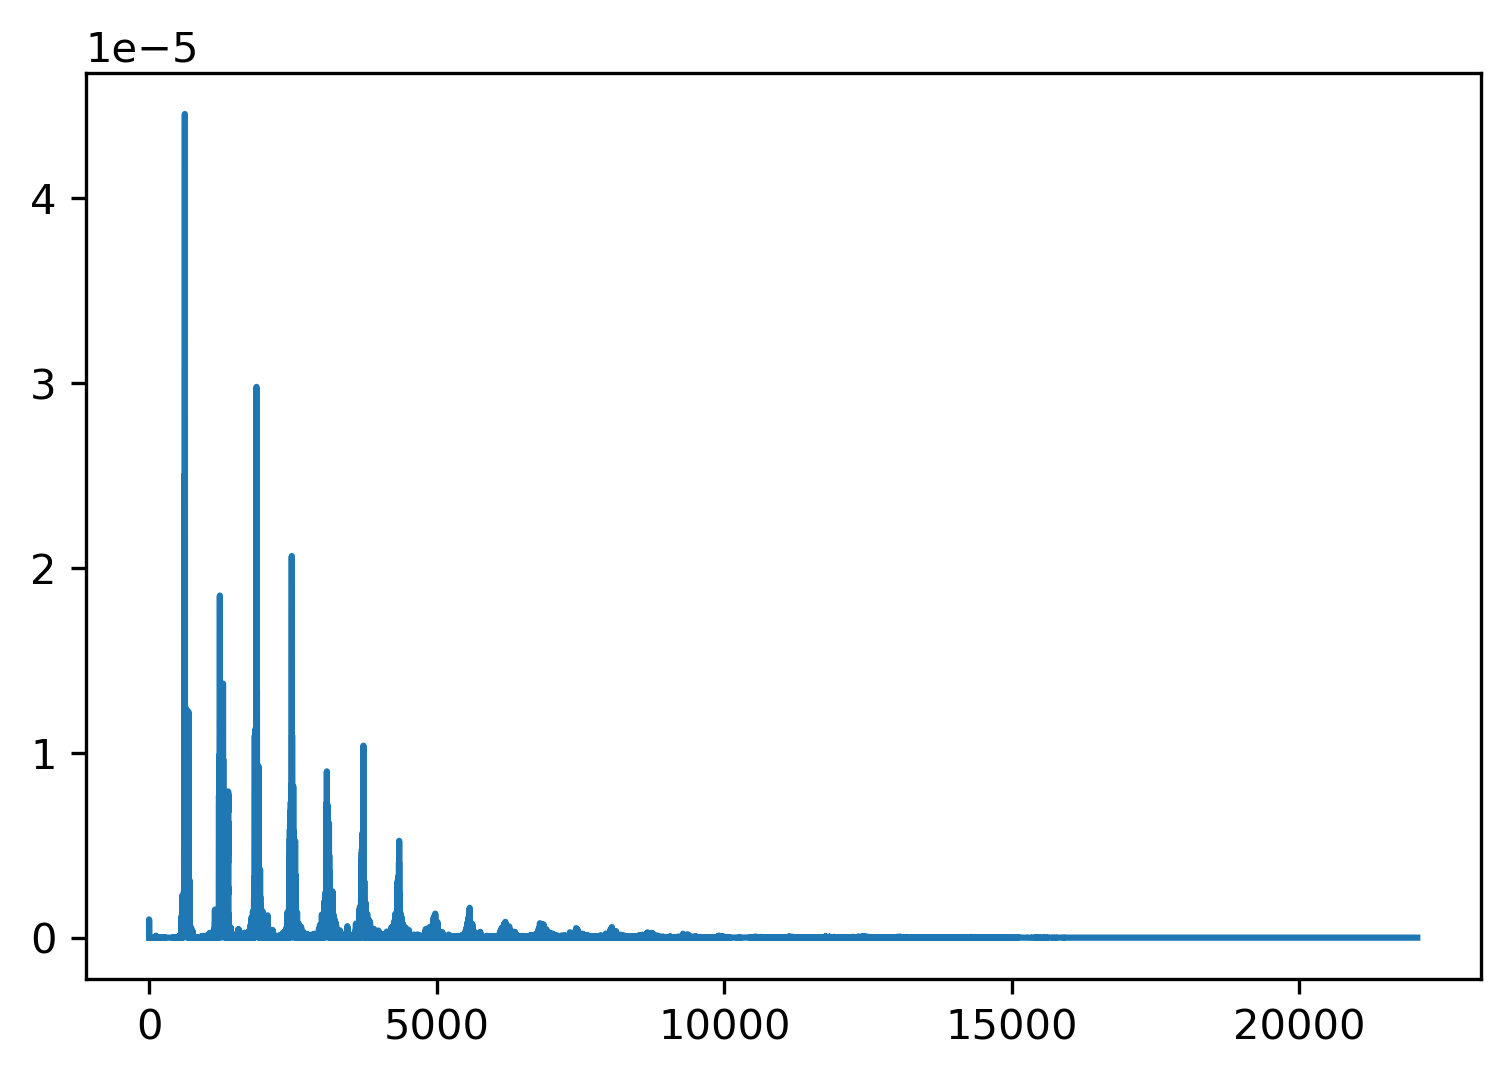

In [22]:
f, P = periodogram(sig[:samplerate*t,0], samplerate)

plt.figure(dpi=300)
plt.plot(f[:],P[:])

In [50]:
from scipy.signal import butter, sosfilt

sos = butter(10, [0.1,30], btype = 'bandpass', output = 'sos', fs= samplerate)
filtered = sosfilt(sos, sig[:samplerate*t*120,0])

([], [])

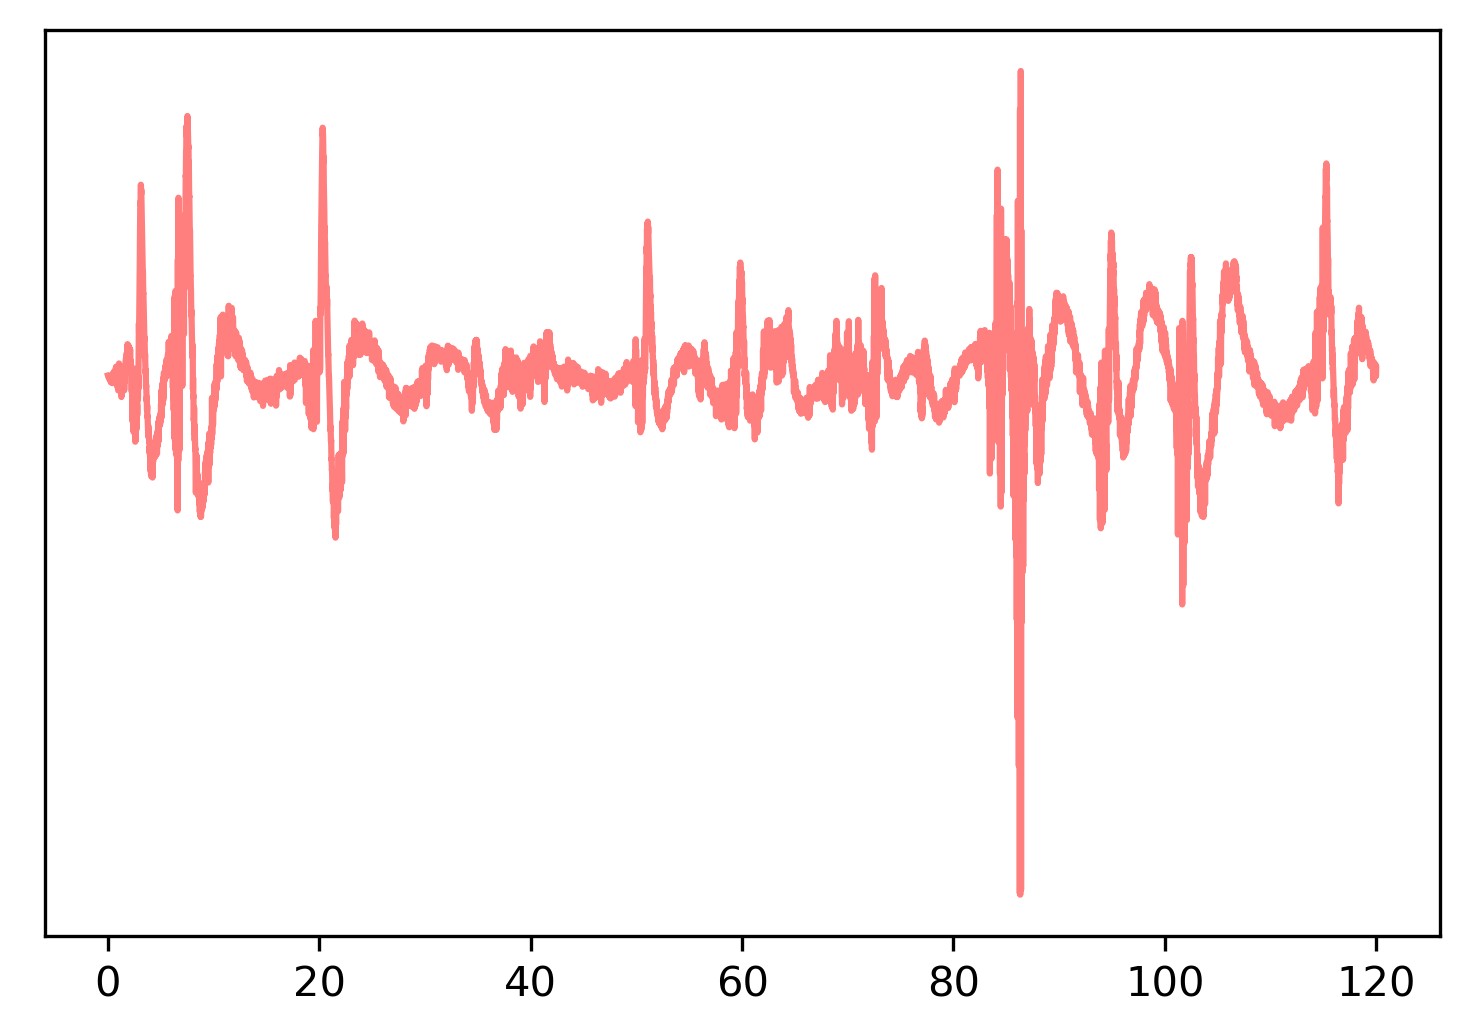

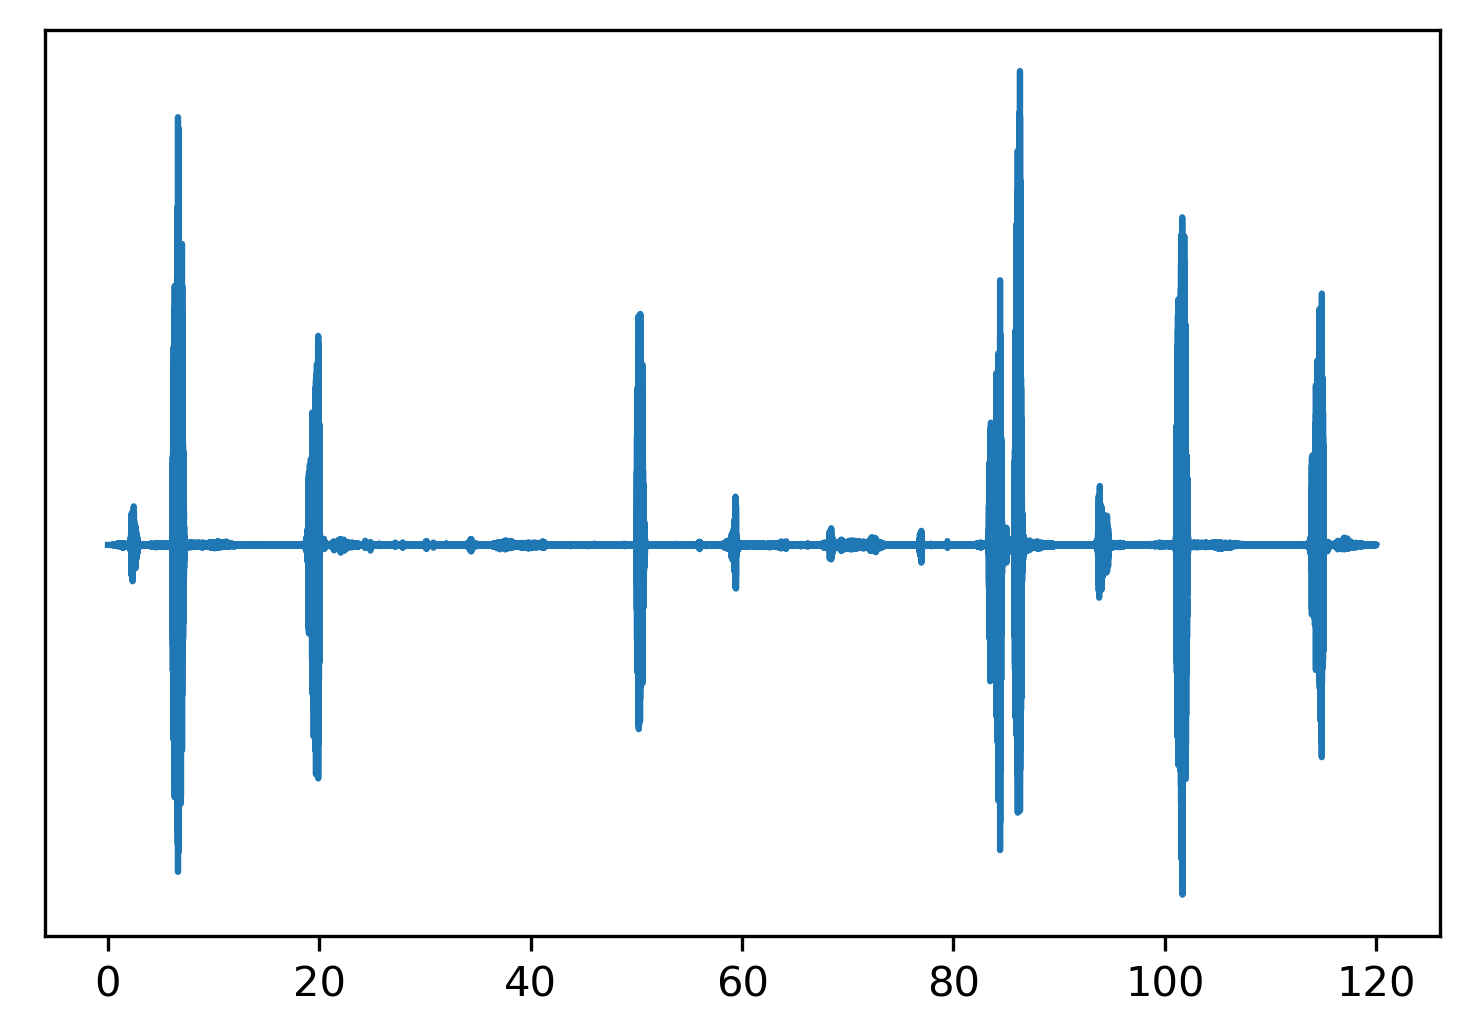

In [51]:
fig = plt.figure(dpi=300)
plt.plot(np.arange(0,t*120,1./samplerate), filtered, color='r', alpha=0.5)
plt.yticks([])

plt.figure(dpi=300)
plt.plot(np.arange(0,t*120,1./samplerate), sig[:samplerate*t*120,1])
plt.yticks([])

In [41]:
from scipy.signal import spectrogram

f, times, Sxx = spectrogram(sig[:samplerate*120,0], fs=samplerate, nperseg=1024*20)

In [42]:
print(Sxx.shape)
print(f)
print(f.shape)
print(f[:100])

(10241, 295)
[0.00000000e+00 2.15332031e+00 4.30664062e+00 ... 2.20456934e+04
 2.20478467e+04 2.20500000e+04]
(10241,)
[  0.           2.15332031   4.30664062   6.45996094   8.61328125
  10.76660156  12.91992188  15.07324219  17.2265625   19.37988281
  21.53320312  23.68652344  25.83984375  27.99316406  30.14648438
  32.29980469  34.453125    36.60644531  38.75976562  40.91308594
  43.06640625  45.21972656  47.37304688  49.52636719  51.6796875
  53.83300781  55.98632812  58.13964844  60.29296875  62.44628906
  64.59960938  66.75292969  68.90625     71.05957031  73.21289062
  75.36621094  77.51953125  79.67285156  81.82617188  83.97949219
  86.1328125   88.28613281  90.43945312  92.59277344  94.74609375
  96.89941406  99.05273438 101.20605469 103.359375   105.51269531
 107.66601562 109.81933594 111.97265625 114.12597656 116.27929688
 118.43261719 120.5859375  122.73925781 124.89257812 127.04589844
 129.19921875 131.35253906 133.50585938 135.65917969 137.8125
 139.96582031 142.11914062 1

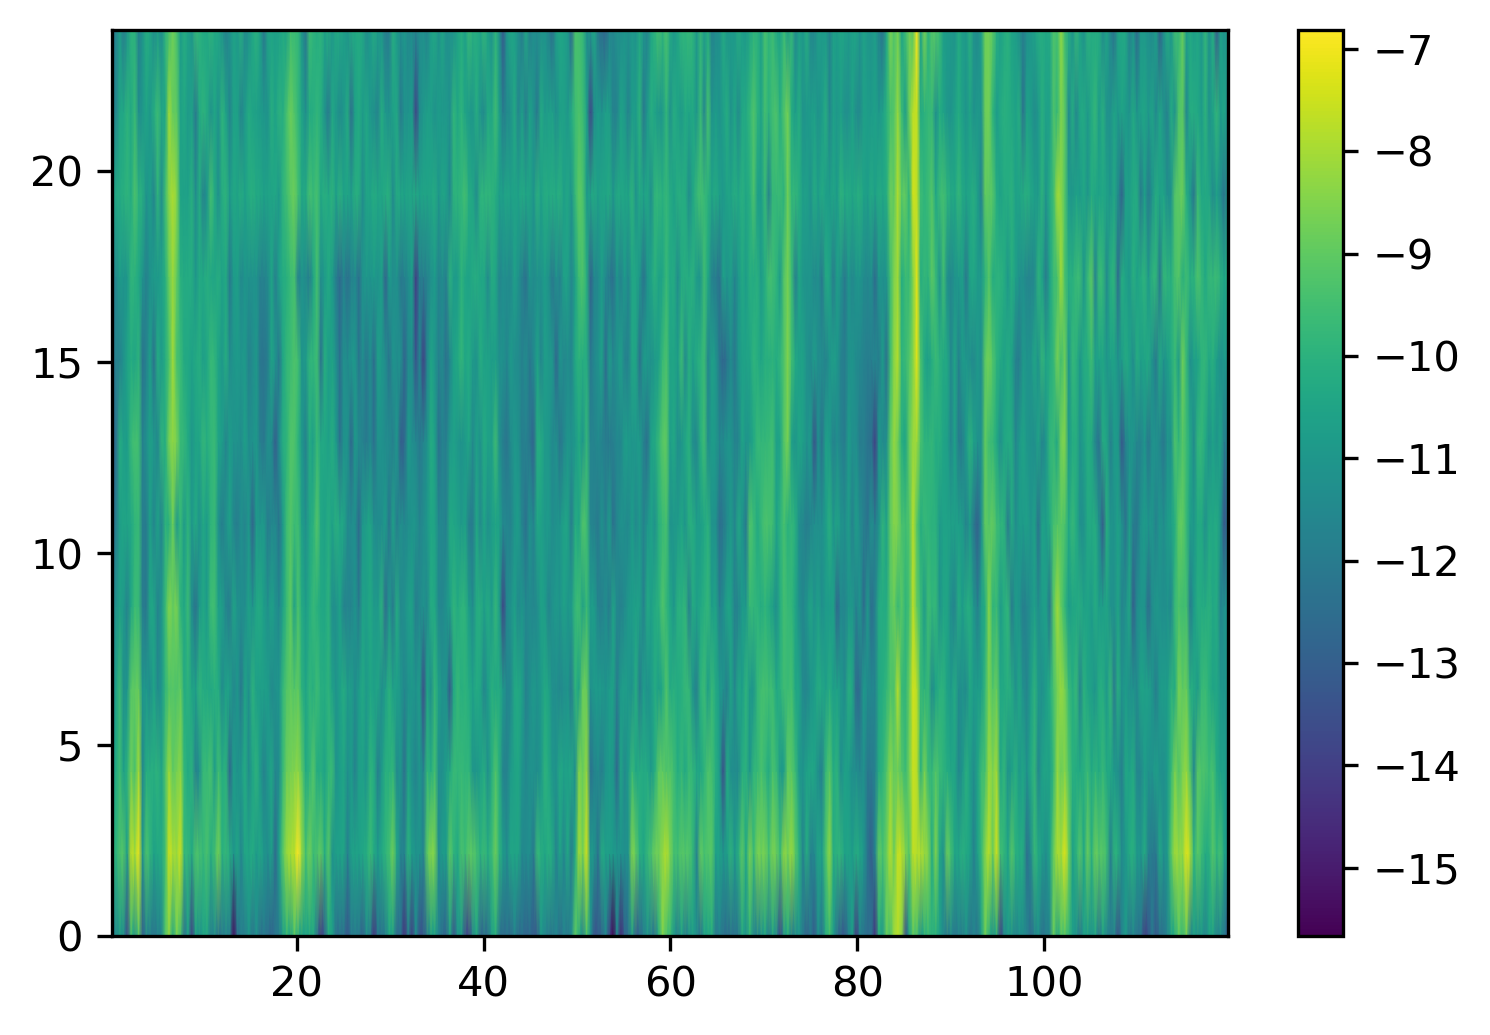

In [48]:
plt.figure(dpi=300)
plt.pcolormesh(times,f[:12],np.log10(Sxx)[:12,:], shading='gouraud')
plt.colorbar()
plt.show()